In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors 
from mpl_toolkits.axes_grid1 import make_axes_locatable

import scipy
import cv2 as cv

import h5py
import pickle
import os
import glob

# auto reload modules 
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('C:/Users/sebas/git')

import icewave.tools.datafolders as df
import icewave.tools.matlab2python as mat2py
import icewave.tools.matlab_colormaps as matcmaps
import icewave.sebastien.set_graphs as set_graphs
import icewave.tools.Fourier_tools as FT
import icewave.drone.drone_projection as dp
import icewave.tools.rw_data as rw

# PARULA COLORMAP 
parula_map = matcmaps.parula()

full_blues = mpl.colormaps['Blues'].resampled(256)
new_blues = colors.ListedColormap(full_blues(np.linspace(0.2,1,256)))

plt.rc('text', usetex=True)
plt.rc('font', family='serif', serif='Computer Modern')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
base = 'D:/Rimouski_2025/Data/'
date = '0214'
drone_ID = 'mesange'
exp_ID = '05-waves_003'

fig_folder = f'{base}{date}/Drones/{drone_ID}/matData/{exp_ID}/Figures/'
if not os.path.isdir(fig_folder):
    os.mkdir(fig_folder)


In [14]:
path2data = f'{base}{date}/Drones/{drone_ID}/matData/{exp_ID}/'
filelist = glob.glob(f'{path2data}*scaled.mat')
print(filelist)

idx_file = 0
file2load = filelist[idx_file]

# load file 
with h5py.File(file2load, 'r') as fmat:
    S = {}

    print('Top-level keys : ', list(fmat.keys()))

    S = mat2py.mat_to_dict(fmat['m'],fmat['m'])
    S = mat2py.transpose_PIVmat_fields(S)

['D:/Rimouski_2025/Data/0214/Drones/mesange/matData/05-waves_003\\PIV_processed_i01050_N0_Dt4_b1_W32_xROI1_width3839_yROI1_height2159_scaled.mat']
Top-level keys :  ['#refs#', '#subsystem#', 'm']


In [15]:
S.keys()

dict_keys(['DRONE', 'GPS', 'ID', 'PIV_param', 'PIXEL', 'SCALE', 'UTC_t', 'Vx', 'Vy', 'Vz', 'X', 'Y', 'name', 't', 't0_UTC', 'units', 'x', 'xref', 'y', 'yref'])

In [41]:
# Vx = FT.supress_quadratic_noise(np.transpose(S['Vx'],(1,0,2)),S['x'],S['y'])
# Vy = FT.supress_quadratic_noise(np.transpose(S['Vy'],(1,0,2)),S['x'],S['y'])
# Vx = np.transpose(Vx,(1,0,2))
# Vy = np.transpose(Vy,(1,0,2))
Vx = np.flip(S['Vx'],(0,1))
Vy = np.flip(S['Vy'],(0,1))

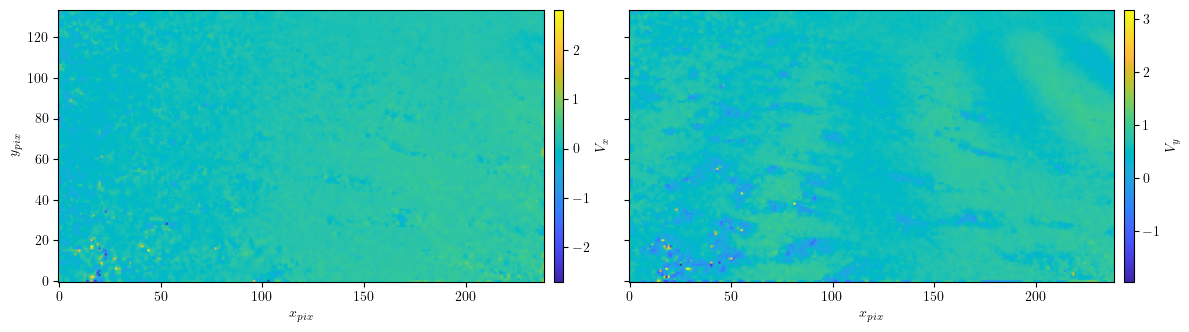

In [42]:
extents_pix = np.array([S['PIXEL']['x_pix'].min(),S['PIXEL']['x_pix'].max(),
                    S['PIXEL']['y_pix'].min(),S['PIXEL']['y_pix'].max()])

frame = 3600

fig, axs = plt.subplots(ncols = 2,sharey = True,figsize = (12,8))
imsh = []
for i,ax in enumerate(axs):
    if i == 0:
        imsh.append(ax.imshow(Vx[:,:,frame].T,cmap = parula_map,origin = 'lower'))
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="2%", pad=0.1)
        cbar = plt.colorbar(imsh[i],cax = cax)
        cbar.set_label(r'$V_x$')
    else:
        imsh.append(ax.imshow(Vy[:,:,frame].T,cmap = parula_map,origin = 'lower'))
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="2%", pad=0.1)
        cbar = plt.colorbar(imsh[i],cax = cax)
        cbar.set_label(r'$V_y$')
   
    ax.set_xlabel(r'$x_{pix}$')     

axs[0].set_ylabel(r'$y_{pix}$')

plt.tight_layout()

In [28]:
S['X']

array([[-137.41457171, -134.65009121, -131.99464772, ...,  -37.24435385,
         -37.03825053,  -36.83441572],
       [-136.25891697, -133.51768571, -130.88457447, ...,  -36.93112933,
         -36.72675933,  -36.52463877],
       [-135.10326222, -132.38528022, -129.77450122, ...,  -36.6179048 ,
         -36.41526813,  -36.21486182],
       ...,
       [ 135.31994749,  132.59760625,  129.98263995, ...,   36.6766344 ,
          36.47367273,   36.272945  ],
       [ 136.47560223,  133.73001174,  131.09271321, ...,   36.98985893,
          36.78516393,   36.58272195],
       [ 137.63125697,  134.86241724,  132.20278646, ...,   37.30308345,
          37.09665513,   36.8924989 ]], shape=(239, 134))